In [110]:
import pandas as pd 
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os 
from time import time 
from time import sleep 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Display options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [23]:
# API request 
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b3c084b2-f9d5-4112-ae08-bf224f802dac',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [24]:
# Create DataFrame from json object 
df = pd.json_normalize(data['data'])

In [25]:
# Add "timestamp" column with current time 
df['timestamp'] = pd.to_datetime('now')

In [46]:
# Function for automating API request
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b3c084b2-f9d5-4112-ae08-bf224f802dac',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    # Create CSV with data
    if not os.path.isfile(r'C:\Users\aldan\OneDrive\Desktop\Data Analyst Bootcamp\Python Files\API Dataset.csv'):
        df.to_csv(r'C:\Users\aldan\OneDrive\Desktop\Data Analyst Bootcamp\Python Files\API Dataset.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\aldan\OneDrive\Desktop\Data Analyst Bootcamp\Python Files\API Dataset.csv', mode='a', header=False)

In [47]:
# Automatically call api_runner() every minute 
for i in range(333):
    api_runner()
    print("API Runner Successful")
    sleep(60)
exit()

API Runner Successful
API Runner Successful


KeyboardInterrupt: 

In [103]:
# Read generated CSV as a DataFrame
df2 = pd.read_csv(r'C:\Users\aldan\OneDrive\Desktop\Data Analyst Bootcamp\Python Files\API Dataset.csv')

In [104]:
# Drop column with original indices 
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [105]:
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11115,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19714712.00000,19714712.00000,False,NaN,1,NaN,NaN,NaN,2024-06-20T19:47:00.000Z,64991.92871,25204154431.26736,2.93500,-0.03549,0.30447,-2.52713,-6.35929,0.36723,1.82056,1281297156929.11279,54.18950,1364830503002.60010,NaN,2024-06-20T19:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 15:48:53.784426
1,1027,Ethereum,ETH,ethereum,9073,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122275219.40356,122275219.40356,True,NaN,2,NaN,NaN,NaN,2024-06-20T19:46:00.000Z,3519.14145,16371412052.78713,-2.15050,-0.09531,-0.62133,0.98326,-5.21790,11.65351,5.59563,430303792469.43591,18.20160,430303792469.44000,NaN,2024-06-20T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 15:48:53.784426
2,825,Tether USDt,USDT,tether,89201,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112891354601.68275,116081999193.07196,True,NaN,3,NaN,NaN,NaN,2024-06-20T19:46:00.000Z,0.99919,52909237200.24258,-0.94050,-0.00469,-0.04167,-0.04662,-0.06310,-0.11465,-0.10693,112800108934.39410,4.76860,115988174652.53000,NaN,2024-06-20T19:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-20 15:48:53.784426
3,1839,BNB,BNB,bnb,2185,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147583787.26730,147583787.26730,False,NaN,4,NaN,NaN,NaN,2024-06-20T19:46:00.000Z,592.27587,1764811972.77199,-3.95680,-0.34577,-0.97825,-1.89750,-2.75445,2.63307,8.11709,87410316154.60223,3.69740,87410316154.60001,NaN,2024-06-20T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 15:48:53.784426
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,461894363.24679,578461094.79755,True,NaN,5,NaN,NaN,NaN,2024-06-20T19:46:00.000Z,133.87936,2476737275.48103,0.33680,-0.50608,-1.70663,-9.78242,-23.45215,-10.09249,-22.41643,61838119760.36048,2.61530,77443998678.30000,NaN,2024-06-20T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 15:48:53.784426
5,3408,USDC,USDC,usd-coin,19817,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32638522773.31858,32638522773.31858,False,NaN,6,NaN,NaN,NaN,2024-06-20T19:46:00.000Z,0.99993,5248264143.40713,6.80650,-0.00890,-0.01352,-0.00248,-0.01069,-0.03354,-0.03376,32636340261.51494,1.38030,32636340261.51000,NaN,2024-06-20T19:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-20 15:48:53.784426
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55570463728.00000,99987531962.00000,False,NaN,7,NaN,NaN,NaN,2024-06-20T19:47:00.000Z,0.49049,1149600944.07255,11.64820,-0.16007,-0.95917,1.61218,-8.49835,-6.54932,-19.95198,27256550609.87294,1.15290,49048629040.21000,NaN,2024-06-20T19:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 15:48:53.784426
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144790946383.70526,144790946383.70526,True,NaN,8,NaN,NaN,NaN,2024-06-20T19:47:00.000Z,0.12437,745485132.56012,9.20680,-0.17228,1.31173,-12.64368,-24.23593,-21.29923,-18.14596,18007589021.97132,0.76150,18007589021.97000,NaN,2024-06-20T19:47:00.000Z,NaN,NaN,NaN,NaN

In [106]:
# Group data by "name" and calculate the average percent change per hour, day, week, 30days, 60days, and 90days
df2_grouped = df2.groupby('name')[df2.columns[20:26]].mean()

In [128]:
# Format grouped data for visualization 
df2_grouped_formatted = df2_grouped.stack().to_frame(name='values')
index = pd.Index(range(len(df2_grouped_formatted)))
#df2_grouped_formatted = df2_grouped_formatted.set_index(index)
df2_grouped_formatted = df2_grouped_formatted.reset_index()

In [130]:
df2_grouped_formatted = df2_grouped_formatted.rename(columns={'level_1':'percent_change'})

,name,percent_change,values
0,Avalanche,quote.USD.percent_change_1h,-0.12723
1,Avalanche,quote.USD.percent_change_24h,2.11421
2,Avalanche,quote.USD.percent_change_7d,-12.50272
3,Avalanche,quote.USD.percent_change_30d,-31.56571
4,Avalanche,quote.USD.percent_change_60d,-25.36145
5,Avalanche,quote.USD.percent_change_90d,-48.43700
6,BNB,quote.USD.percent_change_1h,-0.34314
7,BNB,quote.USD.percent_change_24h,-0.95621
8,BNB,quote.USD.percent_change_7d,-1.87411
9,BNB,quote.USD.percent_change_30d,-2.76142


In [141]:
# Rename values in "percent_change" column 
df2_grouped_formatted['percent_change'] = df2_grouped_formatted['percent_change'].replace('quote.USD.percent_change_1h', '1h').replace('quote.USD.percent_change_24h', '24h').replace('quote.USD.percent_change_7d', '7d').replace('quote.USD.percent_change_30d', '30d').replace('quote.USD.percent_change_60d', '60d').replace('quote.USD.percent_change_90d', '90d')
df2_grouped_formatted 

,name,percent_change,values
0,Avalanche,1h,-0.12723
1,Avalanche,24h,2.11421
2,Avalanche,7d,-12.50272
3,Avalanche,30d,-31.56571
4,Avalanche,60d,-25.36145
5,Avalanche,90d,-48.43700
6,BNB,1h,-0.34314
7,BNB,24h,-0.95621
8,BNB,7d,-1.87411
9,BNB,30d,-2.76142


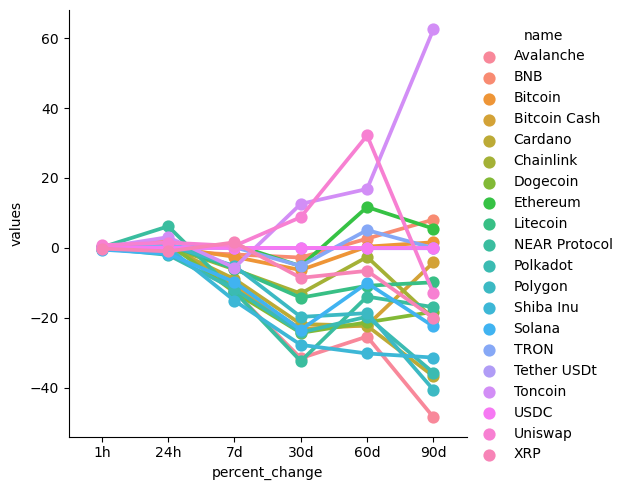

In [142]:
# Create visualization of percent change data 
sns.catplot(x='percent_change', y='values',hue='name', data=df2_grouped_formatted, kind='point')

In [148]:
# Create new DataFrame with select columns from original DataFrame
df3 = df2[['name', 'quote.USD.price', 'timestamp']]

In [151]:
# Filter new dataset for "Bitcoin"
df_bitcoin = df3.query("name == 'Bitcoin'")

C:\Users\aldan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aldan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

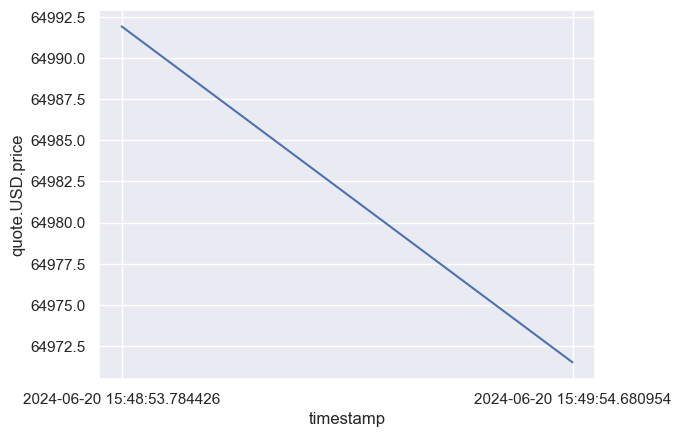

In [154]:
# Visualize "Bitcoin" data
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df_bitcoin)